In [25]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [46]:

# Data from Bureau des Mines et de l'Energie
# https://www.bme.gouv.ht/media/upload/doc/notices/Notice_explicative_du_potentiel_minier_comp.pdf
deposits=["Grand Bois","Morne Bossa","Faille B"]
reserves=[4.73,2.2,1.1]         # millions tons of minerals
gold_part=[2.23,1.84,2.4]       # part of gold in grams/ton
silver_part=[14.9,15,0]         # part of silver in grams/ton

df=pd.DataFrame([deposits,reserves,gold_part,silver_part])
df=df.transpose()
df


,0,1,2,3
0,Grand Bois,4.73,2.23,14.9
1,Morne Bossa,2.2,1.84,15
2,Faille B,1.1,2.4,0


In [47]:
df.columns=["Mineral deposits","Mineral Reserves","Gold part","Silver part",] # provide a name to each column
df

,Mineral deposits,Mineral Reserves,Gold part,Silver part
0,Grand Bois,4.73,2.23,14.9
1,Morne Bossa,2.2,1.84,15
2,Faille B,1.1,2.4,0


In [62]:
# create other variables
df['Gold reserves (in g)']=df['Mineral Reserves']*1000000*df["Gold part"]         # Gold reserves in gram
df['Silver reserves (in g)']=df['Mineral Reserves']*1000000*df["Silver part"]     # Silver reserves in gram
df['Gold reserves (in Oz)']=df['Gold reserves (in g)']/31.103
df['Silver reserves (in Oz)']=df['Silver reserves (in g)']/31.103
df

,Mineral deposits,Mineral Reserves,Gold part,Silver part,Gold reserves (in g),Silver reserves (in g),Gold reserves (in 0z),Silver reserves(in oz),Gold reserves (in Oz),Silver reserves(in Oz),Value of Gold (in USD),Silver reserves (in Oz)
0,Grand Bois,4.73,2.23,14.9,10547900.0,70477000.0,339128.058387,2265922.901328,339128.058387,2265922.901328,695144694.080957,2265922.901328
1,Morne Bossa,2.2,1.84,15,4048000.0,33000000.0,130148.217214,1060990.901199,130148.217214,1060990.901199,266777815.644793,1060990.901199
2,Faille B,1.1,2.4,0,2640000.0,0.0,84879.272096,0.0,84879.272096,0.0,173985531.942256,0.0


In [139]:
df['Value of Gold (in USD)']=df['Gold reserves (in Oz)']*2049.80   # price on March 1rst, 2024 - From https://www.lbma.org.uk/prices-and-data/precious-metal-prices#/table
df['Value of Silver (in USD)']=df['Silver reserves (in Oz)']*22.720  # price on March 1rst, 2024 - From https://www.lbma.org.uk/prices-and-data/precious-metal-prices#/table
df

,Mineral deposits,Mineral Reserves,Gold part,Silver part,Gold reserves (in g),Silver reserves (in g),Gold reserves (in 0z),Silver reserves(in oz),Gold reserves (in Oz),Silver reserves(in Oz),Value of Gold (in USD),Silver reserves (in Oz),Value of Silver (in USD)
0,Grand Bois,4.73,2.23,14.9,10547900.0,70477000.0,339128.058387,2265922.901328,339128.058387,2265922.901328,695144694.080957,2265922.901328,51481768.318169
1,Morne Bossa,2.2,1.84,15,4048000.0,33000000.0,130148.217214,1060990.901199,130148.217214,1060990.901199,266777815.644793,1060990.901199,24105713.275247
2,Faille B,1.1,2.4,0,2640000.0,0.0,84879.272096,0.0,84879.272096,0.0,173985531.942256,0.0,0.0


In [ ]:
4.73*1000000

# Plot

<BarContainer object of 3 artists>

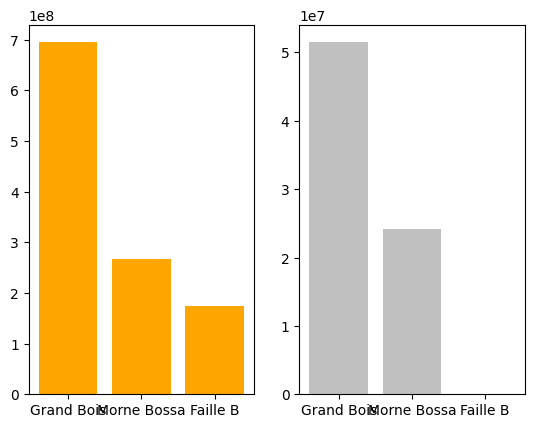

In [140]:
plt.figure()
plt.subplot(121)
plt.bar(df['Mineral deposits'],df['Value of Gold (in USD)'],color='orange')
plt.subplot(122)
plt.bar(df['Mineral deposits'],df['Value of Silver (in USD)'],color='silver')


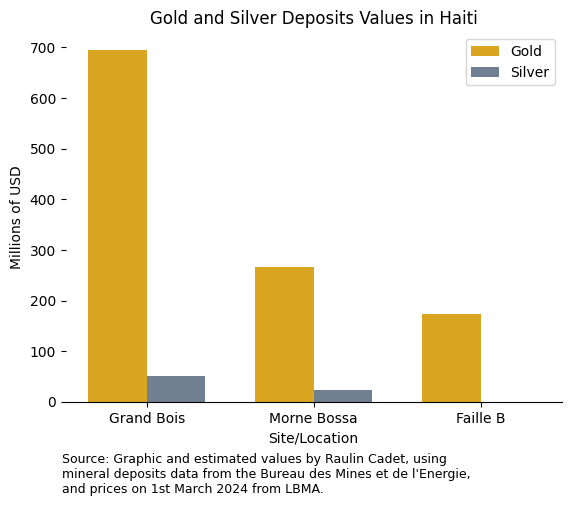

In [157]:
fig, ax = plt.subplots()


bar_width = 0.35            # width of each bar


for i, mineral_deposit in enumerate(df['Mineral deposits']):
    
    x_position = i + 1      # Calculate the position of the bars for this mineral deposit
    labelg=['Gold','Silver']
    # Plot the gold bar
    if i<=0:
        ax.bar(x_position - bar_width/2, df.loc[i, 'Value of Gold (in USD)']/1000000, color='goldenrod', width=bar_width, label='Gold')
    
    # Plot the silver bar
        ax.bar(x_position + bar_width/2, df.loc[i, 'Value of Silver (in USD)']/1000000, color='slategray', width=bar_width, label='Silver')
    if i>0:
        
        ax.bar(x_position - bar_width/2, df.loc[i, 'Value of Gold (in USD)']/1000000, color='goldenrod', width=bar_width)
    
    # Plot the silver bar
        ax.bar(x_position + bar_width/2, df.loc[i, 'Value of Silver (in USD)']/1000000, color='slategray', width=bar_width)

# Set the x-axis ticks and labels
ax.set_xticks(range(1, len(df) + 1))
ax.set_xticklabels(df['Mineral deposits'])


ax.set_xlabel('Site/Location')   
ax.set_ylabel('Millions of USD')
ax.set_title('Gold and Silver Deposits Values in Haiti')  
plt.legend() 
ax.spines[['top','right','left']].set_visible(False)  
fig.text(0.12, -0.08, "Source: Graphic and estimated values by Raulin Cadet, using \nmineral deposits data from the Bureau des Mines et de l'Energie, \nand prices on 1st March 2024 from LBMA.",  
 ha='left',fontsize=9)
plt.show()

In [147]:
np.sum(df['Value of Gold (in USD)'])/1000000000

1.1359080416680065